<i><b>Public AI</b></i>
<br>
###  &nbsp;&nbsp; **✎&nbsp;&nbsp;Week 1. OpenCV Basis**
# Section 5. 영상을 그리기

### _Objective_
1. **영상을 그리기** : 영상을 직접 그리는 방법에 대해 알아봅니다. <br>

In [1]:
# 영상처리에 있어서 핵심적인 matplotlib과 opencv , numpy 가져오기
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
if not os.path.exists("stop.jpg"):
    !wget https://i.imgur.com/KgxdASJ.jpg
    os.rename("KgxdASJ.jpg","stop.jpg")
if not os.path.exists("load.jpg"):    
    !wget https://i.imgur.com/KRUc38u.png
    os.rename("KRUc38u.png","load.jpg")  
if not os.path.exists("detection.jpg"):    
    !wget https://i.imgur.com/tDACec6.jpg
    os.rename("tDACec6.jpg","detection.jpg")

--2019-12-19 18:41:51--  https://i.imgur.com/KgxdASJ.jpg
Resolving i.imgur.com... 151.101.24.193
Connecting to i.imgur.com|151.101.24.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23091 (23K) [image/jpeg]
Saving to: 'KgxdASJ.jpg'

KgxdASJ.jpg         100%[===================>]  22.55K  --.-KB/s    in 0.1s    

2019-12-19 18:41:52 (156 KB/s) - 'KgxdASJ.jpg' saved [23091/23091]

--2019-12-19 18:41:52--  https://i.imgur.com/KRUc38u.png
Resolving i.imgur.com... 151.101.24.193
Connecting to i.imgur.com|151.101.24.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 957969 (936K) [image/png]
Saving to: 'KRUc38u.png'

KRUc38u.png         100%[===================>] 935.52K   917KB/s    in 1.0s    

2019-12-19 18:41:54 (917 KB/s) - 'KRUc38u.png' saved [957969/957969]

--2019-12-19 18:41:54--  https://i.imgur.com/tDACec6.jpg
Resolving i.imgur.com... 151.101.24.193
Connecting to i.imgur.com|151.101.24.193|:443... connected.
HTTP request sen

# \[ 1. 영상 그리기\]

이번 시간에는 OpenCV에서 제공하는 다양한 메소드들을 활용해 직접 영상을 그려보겠습니다. 이미 존재하는 영상을 변환하는 과정이 아닌 영상 위에 직접 그리고 싶은 영상을 그려보겠습니다.

## 1. 직선 그리기

`cv2.line(img, pt1, pt2, color, thickness, lineType, shift)`

**parameters**
* img : Image where the line will be drawn.
* pt1 : First point of the line segment.(시작점)
* pt2 : Second point of the line segment.(끝점)
* color : Line Color. (BGR형태의 color)
* thickness : Line Thickness.
* lineType :
    * LINE_8 : 8-connected line
    * LINE_4 : 4-connected line
    * LINE_AA : antialiased line.
* shift : Number of fractional bits in the point coordinates

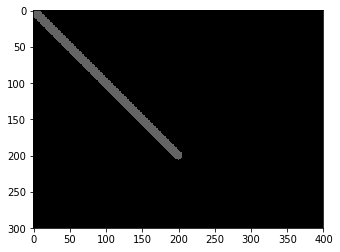

In [2]:
canvas = np.zeros((300,400,3),dtype=np.uint8)

cv2.line(canvas, (0,0), (200,200), 
         (100,100,100), 10, cv2.LINE_8,0)

plt.imshow(canvas)
plt.show()

## 2. 직사각형 그리기

`cv2.rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]])`

**parameters**
* img : Image where the rectangle will be drawn.
* pt1 : Vertex of the rectangle. (시작 좌표)
* pt2 : Vertex of the rectangle opposite to pt1. (끝 좌표)
* color : Rectangle color. (BGR형태의 color)
* thickness : Line Thickness (if you want to fill, cv2.FILLED)
* lineType :
    * LINE_8 : 8-connected line
    * LINE_4 : 4-connected line
    * LINE_AA : antialiased line.
* shift : Number of fractional bits in the point coordinates

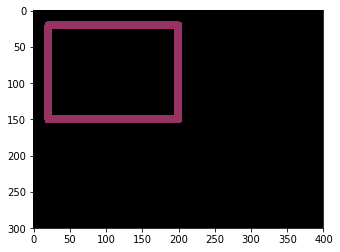

In [3]:
canvas = np.zeros((300,400,3),dtype=np.uint8)

cv2.rectangle(canvas, (20,20), (200,150), 
         (150,50,100), 10, cv2.LINE_8,0)
plt.imshow(canvas)
plt.show()

### 문제 1. 영상에 직사각형 그리기

* 아래의 이미지에서 'STOP' TEXT를 모두 감싸는 직사각형을 예시와 같이 그려주세요.

예시 : <br>
<img src="https://i.imgur.com/x7vIA91.png" width="400" height="300"/>

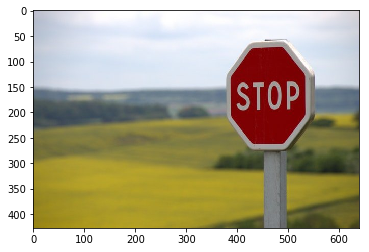

In [4]:
image = cv2.imread("./stop.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

############
# CODE HERE!
############
    
plt.imshow(image)
plt.show()

## 3. 다각형 그리기

`cv2.polylines(img, pts, isClosed, color[, thickness[, lineType[, shift]]])`

**parameters**
* img : Image where the polygon will be drawn.
* pts : Array of polygonal curves. (연결될 꼭지점 좌표들)
* isClosed : Flag indicating whether the drawn polylines are closed or not. If they are closed, the function draws a line from the last vertex of each curve to its first vertex.
* color : Rectangle color 
* thickness : Thickness of the polyline edges.

* lineType :
    * LINE_8 : 8-connected line
    * LINE_4 : 4-connected line
    * LINE_AA : antialiased line.
* shift : Number of fractional bits in the point coordinates

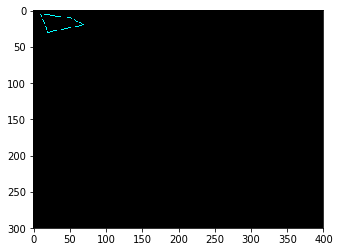

In [6]:
canvas = np.zeros((300,400,3),dtype=np.uint8)

pts = np.array([[10,5], 
                [20,30], 
                [70,20], 
                [50,10]], np.int32) # 각 꼭지점은 2차원 행렬로 선언
# 이미지에 표현하기 위해 3차원 행렬로 변환. 변환이전과 이후의 행렬 갯수는 동일해야함.
# -1은 원본에 해당하는 값을 그대로 유지.

canvas = cv2.polylines(canvas, [pts], True, (0,255,255),thickness=1)
plt.imshow(canvas)

### 문제 2. 영상에 다각형 그리기

* 아래 이미지에서 자동차 2대를 각각 감싸는 다각형을 예시와 같이 그려주세요.

예시 : <br>
<img src="https://i.imgur.com/iduF9Bz.png" width="400" height="300"/>

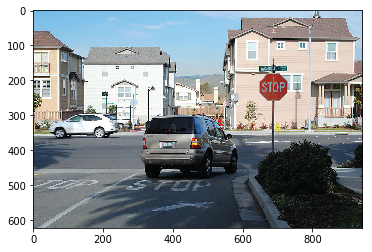

In [7]:
image = cv2.imread("./load.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

############
# CODE HERE!
############

plt.imshow(image)

`cv2.polylines` 메소드로는 다각형의 안쪽 색을 채울 수 있는 방법이 없다. `cv2.fillPoly` 메소드를 사용해 다각형의 안쪽을 채울 수 있습니다.

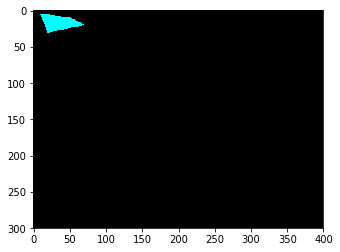

In [9]:
canvas = np.zeros((300,400,3),dtype=np.uint8)

pts = np.array([[10,5], 
                [20,30], 
                [70,20], 
                [50,10]], np.int32) # 각 꼭지점은 2차원 행렬로 선언
# 이미지에 표현하기 위해 3차원 행렬로 변환. 변환이전과 이후의 행렬 갯수는 동일해야함.
# -1은 원본에 해당하는 값을 그대로 유지.

canvas = cv2.fillPoly(canvas, [pts], (0,255,255))
plt.imshow(canvas)
plt.show()

## 4. 원 그리기

`cv2.circle(img, center, radian, color, thickness))`

**parameters**
* img : Image where the circle will be drawn.
* center : Center of the circle.
* radius : Radius of the circle.
* color : Circle color.
* thickness : Thickness of the circle outline, if positive. Negative thickness means that a filled circle is to be drawn.
* lineType : Type of the circle boundary. See the line() description.
* shift : Number of fractional bits in the coordinates of the center and in the radius value.


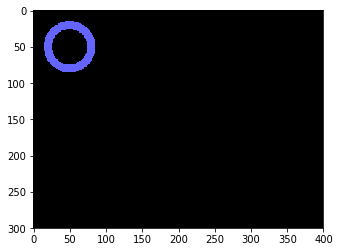

In [10]:
canvas = np.zeros((300,400,3),dtype=np.uint8)

cv2.circle(canvas, (50,50), 30, 
         (100,100,255), 10, cv2.LINE_8,0)

plt.imshow(canvas)
plt.show()

## 5. 이미지에 Text 추가하기

`cv2.putText(img, text, org, font, fontSacle, color)`

* img : Image
* text : Text string to be drawn.
* org - Bottom-left corner of the text string in the image.
* font - CvFont
    * cv2.FONT_HERSHEY_SIMPLEX normal size sans-serif font
    * cv2.FONT_HERSHEY_PLAIN small size sans-serif font
    * cv2.FONT_HERSHEY_DUPLEX normal size sans-serif font (more complex than cv2.FONT_HERSHEY_SIMPLEX )
    * cv2.FONT_HERSHEY_COMPLEX normal size serif font
    * cv2.FONT_HERSHEY_TRIPLEX normal size serif font (more complex than cv2.FONT_HERSHEY_COMPLEX )
    * cv2.FONT_HERSHEY_COMPLEX_SMALL smaller version of cv2.FONT_HERSHEY_COMPLEX
    * cv2.FONT_HERSHEY_SCRIPT_SIMPLEX hand-writing style font
    * cv2.FONT_HERSHEY_SCRIPT_COMPLEX more complex variant of cv2.FONT_HERSHEY_SCRIPT_SIMPLEX
* fontScale :  Font scale factor that is multiplied by the font-specific base size.
* color : Text Color
* thickness : Thickness of the lines used to draw a text.
* lineType : Line type. See the line for details
* bottomLeftOrigin : When true, the image data origin is at the bottom-left corner. 


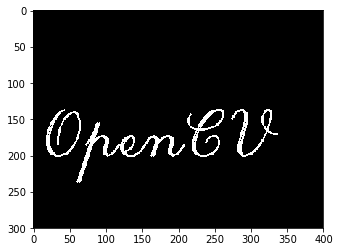

In [11]:
canvas = np.zeros((300,400,3),dtype=np.uint8)

cv2.putText(canvas, 'OpenCV', 
            (10,200), cv2.FONT_HERSHEY_SCRIPT_COMPLEX, 
            3, (255,255,255),2)

plt.imshow(canvas)
plt.show()

### 문제 3. 영상에 Text 추가하기

* 아래 이미지에서 사람(Person), 말(Horse), 강아지(Dog)을 각각 감싸는 직사각형과 직사각형 아래에 각각의 이름 text를 예시와 같이 그려주세요.

예시 : <br>

<img src="https://i.imgur.com/4lJMsFa.png" width="400" height="300"/>

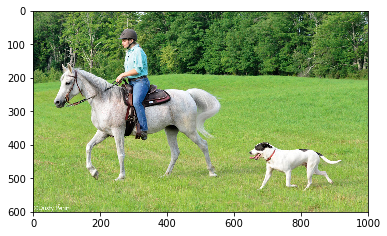

In [12]:
image = cv2.imread("./detection.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

############
# CODE HERE!
############

plt.imshow(image)
plt.show()

<hr>

Copyright(c) 2019 by Public AI. All rights reserved. last updated on 2019/02/01<br>
Writen by PAI, SangJae Kang(rocketgrowthsj@publicai.co.kr) 
<hr>